In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import re
import importlib
from scipy.ndimage import median_filter
import sys
from windrose import WindroseAxes
import cmcrameri as cmc
from cmcrameri import cm
from scipy.stats import linregress

# Add parent directory's src to path for package imports
parent_dir = os.path.dirname(os.getcwd())
src_path = os.path.join(parent_dir, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import modules from the installed package
from ec import (
    constants,
    func_read_data,
    func_despike_data,
    sensor_info,
    func_dr,
    func_mrfd,
)
from mo import func_mo
from spc import normalize
from plotting import funcs_plots

# For development: auto-reload modules
%load_ext autoreload
%autoreload 2

# Import all functions into namespace (for convenience)
from ec import *
from mo import *
from spc import *
from plotting import *

print("✓ All imports successful!")

ModuleNotFoundError: No module named 'ec'

In [3]:
"""Get LiDAR data"""
folder='/home/engbers/Documents/PhD/Data/LiDAR'
lidar=pd.read_csv(os.path.join(folder, 'LiDAR_STA.csv'), sep=',', header=0, parse_dates=True, index_col=0) 

In [4]:
"""READ IN EDDYPRO FILES"""
folder='/home/engbers/Documents/PhD/EC_data_convert/'
# folder='/run/user/72637/gvfs/smb-share:domain=INTRANET,server=samba.hpc.epfl.ch,share=cryos,user=engbers/CRYOS/Projects/Antarctica/PrincessElisabeth/Season_2024-2025/DATA/processed/'
sensor='SFC_DR'
fluxes_SFC = read_eddypro_data(folder, sensor)
fluxes_SFC_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_16m_DR'
fluxes_16m = read_eddypro_data(folder, sensor)
fluxes_16m_qc = read_eddypro_data(folder, sensor, qc=True)
sensor='CSAT_26m_DR'
fluxes_26m_qc = read_eddypro_data(folder, sensor, qc=True)
fluxes_26m = read_eddypro_data(folder, sensor)


Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_full_output_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_full_output_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_full_output_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_full_output_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_full_output_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_full_output_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_full_output_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/20241

/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/Func_read_data.py:425: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  [pd.read_csv(file, header=1) for file in files],
/home/engbers/Documents/Github/DataProcessingScripts/F

Files found: ['/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202405/eddypro_May2024_qc_details_2025-05-22T145422_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202408/eddypro_Aug2024_qc_details_2025-05-23T090214_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202412/eddypro_Dec2024_qc_details_2025-05-23T123929_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202407/eddypro_Jul2024_qc_details_2025-05-22T164622_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202401/eddypro_SFC_Jan2024_qc_details_2025-05-21T184431_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202404/eddypro_Apr2024_qc_details_2025-05-22T135551_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202409/eddypro_Sep2024_qc_details_2025-05-23T102118_adv.csv', '/home/engbers/Documents/PhD/EC_data_convert/SFC_DR/Eddypro_output/202411/eddyp

In [15]:
"""READ AND CLEAN SLOWDATA"""
folder='/run/user/72637/gvfs/smb-share:server=memobi.wsl.ch,share=pub/Turbulence/PEA/Season_2024-2025/DATA/MET/converted/'
folder='/home/engbers/Documents/PhD/EC_data_convert/converted/'
# folder='/run/user/72637/gvfs/smb-share:domain=INTRANET,server=samba.hpc.epfl.ch,share=cryos,user=engbers/CRYOS/Projects/Antarctica/PrincessElisabeth/Season_2024-2025/DATA/converted/'
sensor='SFC'
start='2024-01-01 00:00'
end='2025-01-01 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights = get_sensor_info(sensor, 2024)

"""READ FAST AND SLOW DATA from folder"""
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=False)

"""CLEAN SLOWDATA"""
slowdata_cleaned=clean_slowdata(slowdata)


Using 2024 calibration coefficients
{'A': 4820.04, 'B': 3792900.0, 'C': -115477000.0, 'H2O_Zero': 0.7087, 'H20_Span': 0.9885}
Reading data from /home/engbers/Documents/PhD/EC_data_convert/converted/20240118_SFC
TOA5_STN1OneMin_403_2023_12_31_1506.dat
TOA5_STN1OneMin_404_2024_01_01_1506.dat
TOA5_STN1OneMin_405_2024_01_02_1506.dat
TOA5_STN1OneMin_406_2024_01_03_1506.dat
TOA5_STN1OneMin_407_2024_01_04_1506.dat
TOA5_STN1OneMin_408_2024_01_05_1506.dat
TOA5_STN1OneMin_409_2024_01_06_1506.dat
TOA5_STN1OneMin_410_2024_01_07_1506.dat
TOA5_STN1OneMin_411_2024_01_08_1506.dat
TOA5_STN1OneMin_412_2024_01_09_1506.dat
TOA5_STN1OneMin_413_2024_01_10_1506.dat
TOA5_STN1OneMin_414_2024_01_11_1506.dat
TOA5_STN1OneMin_415_2024_01_12_1506.dat
TOA5_STN1OneMin_416_2024_01_13_1506.dat
TOA5_STN1OneMin_417_2024_01_14_1506.dat
TOA5_STN1OneMin_418_2024_01_15_1506.dat
TOA5_STN1OneMin_419_2024_01_16_1506.dat
TOA5_STN1OneMin_420_2024_01_17_1506.dat
Reading data from /home/engbers/Documents/PhD/EC_data_convert/convert

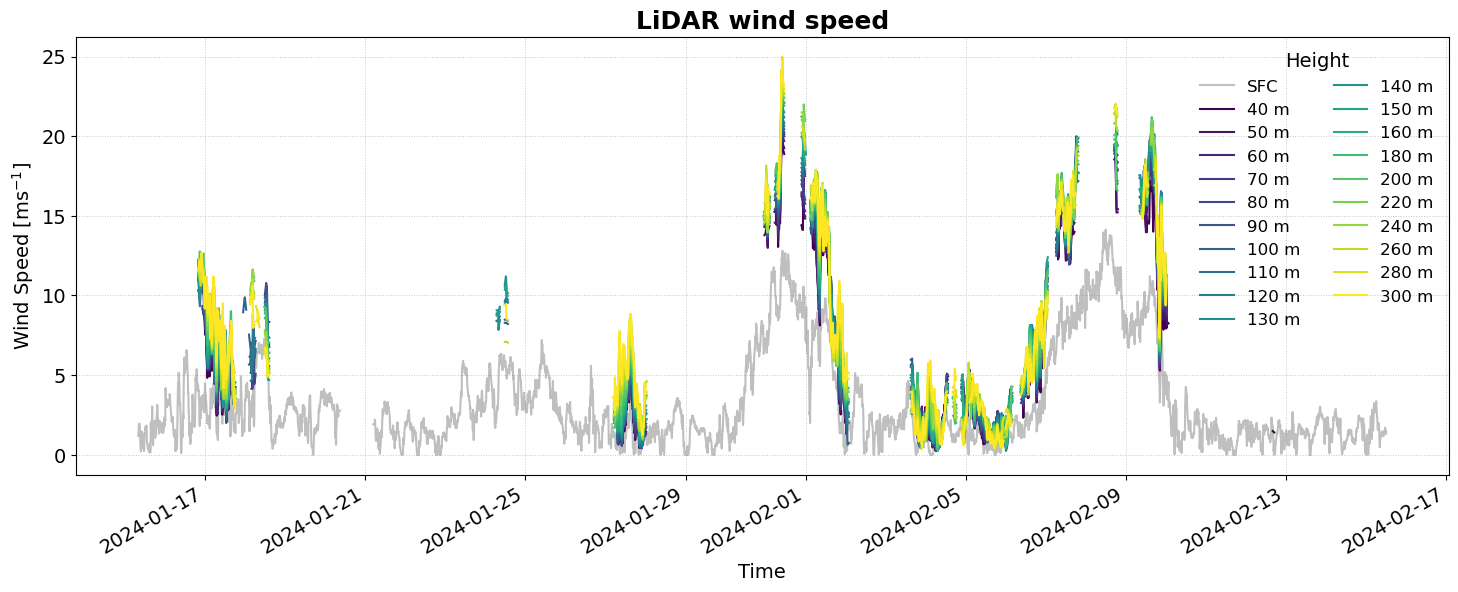

In [27]:
start = '2024-01-15 08:00:00'
end = '2024-02-15 12:00:00'
plt.figure(figsize=(15, 6))

# Extract heights from column names for labeling
heights_plot = []
for col in wind_speed_cols:
    match = re.search(r'(\d+)m', col)
    if match:
        heights_plot.append(int(match.group(1)))
    else:
        heights_plot.append(col)  # fallback

# Use a scientific colormap and line styles
colors = cm.viridis(np.linspace(0, 1, len(wind_speed_cols)))
# linestyles = ['-', '--', '-.', ':'] * (len(wind_speed_cols) // 4 + 1)

plt.plot(
    resample_with_threshold(slowdata_cleaned['WS2_Avg'][start:end], '10min', interpolate=True),
    label='SFC',
    color='grey',
    alpha=0.5,
    linestyle='-',
    linewidth=1.5)

for i, column in enumerate(wind_speed_cols):
    plt.plot(
        resample_with_threshold(lidar[column][start:end], '10min', interpolate=True),
        label=f"{heights_plot[i]} m",
        color=colors[i],
        # linestyle=linestyles[i],
        linewidth=1.5
    )

plt.title('LiDAR wind speed', fontsize=18, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'Wind Speed [ms$^{-1}$]', fontsize=14)
plt.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
plt.legend(title="Height", frameon=False, fontsize=12, title_fontsize=14, loc='upper right', ncol=2)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.gcf().autofmt_xdate()
plt.savefig('/home/engbers/Documents/PhD/Data/plots/LiDAR_wind_speed.png', bbox_inches='tight', dpi=300)
plt.show()


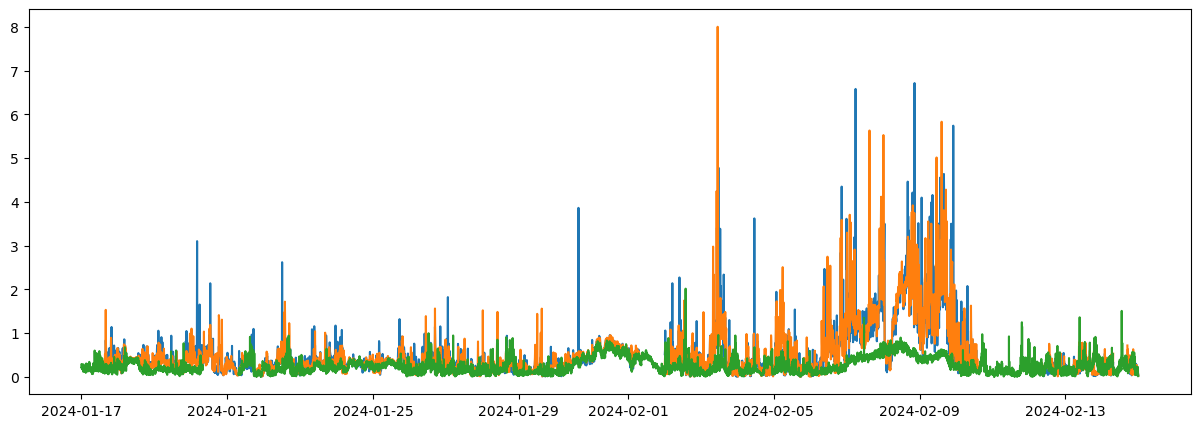

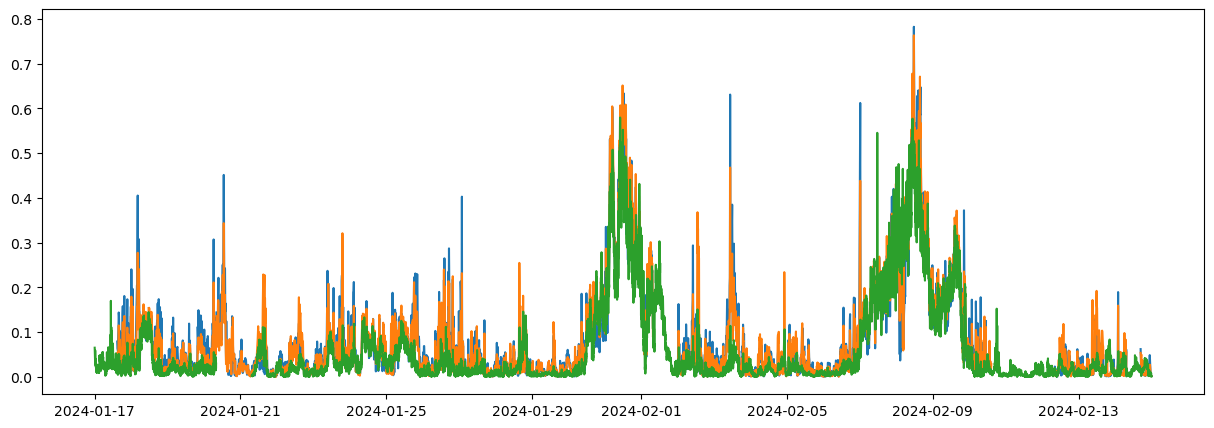

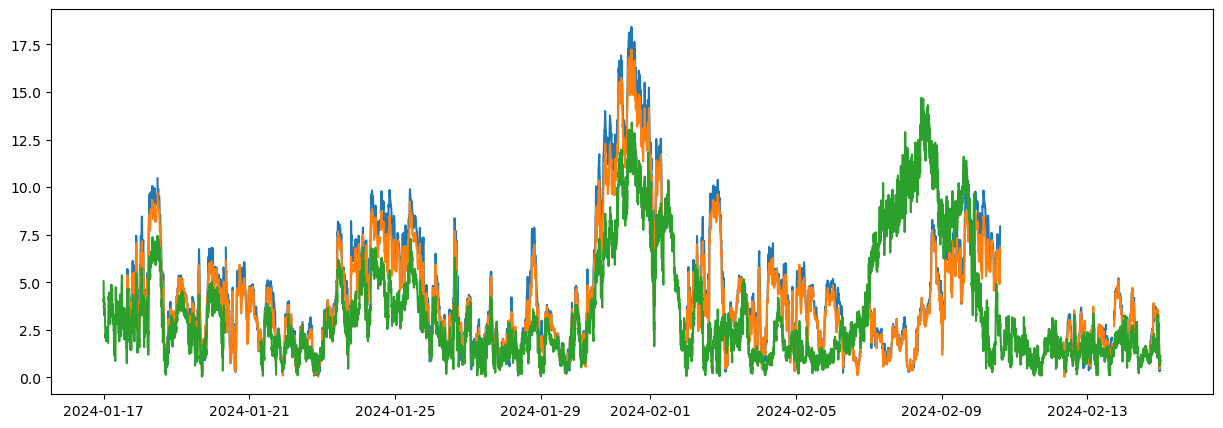

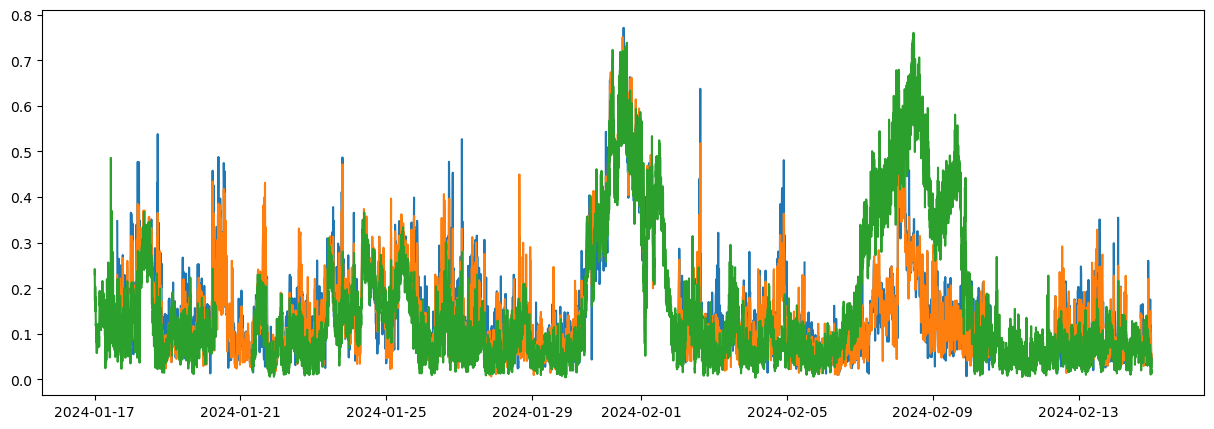

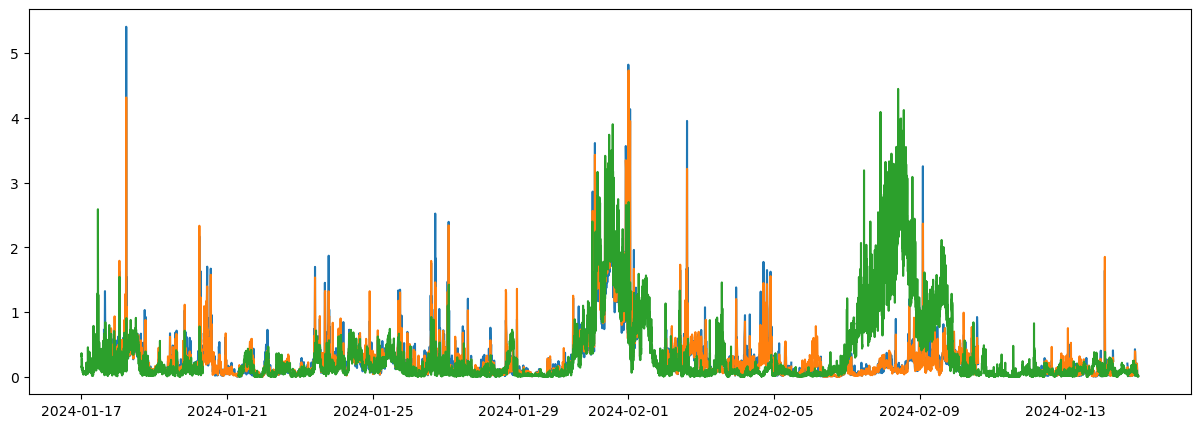

In [6]:
start='2024-01-17 00:00:00'
end='2024-02-15 00:00:00'

plt.figure(figsize=(15, 5))
plt.plot(fluxes_26m['w_var']/fluxes_26m['u*'][start:end])
plt.plot(fluxes_16m['w_var']/fluxes_16m['u*'][start:end])
plt.plot(fluxes_SFC['w_var']/fluxes_SFC['u*'][start:end])

plt.figure(figsize=(15, 5))
plt.plot(fluxes_26m['w_var'][start:end])
plt.plot(fluxes_16m['w_var'][start:end])
plt.plot(fluxes_SFC['w_var'][start:end])

plt.figure(figsize=(15, 5))
plt.plot(fluxes_26m['wind_speed'][start:end])
plt.plot(fluxes_16m['wind_speed'][start:end])
plt.plot(fluxes_SFC['wind_speed'][start:end])


plt.figure(figsize=(15, 5))
plt.plot(fluxes_26m['u*'][start:end])
plt.plot(fluxes_16m['u*'][start:end])
plt.plot(fluxes_SFC['u*'][start:end])

plt.figure(figsize=(15, 5))
plt.plot(fluxes_26m['u_var'][start:end])
plt.plot(fluxes_16m['u_var'][start:end])
plt.plot(fluxes_SFC['u_var'][start:end])

In [11]:
# Extract heights from column names
wind_speed_cols = [col for col in lidar.columns if 'WindSpeed(m/s)' in col]
wind_speed_max_cols = [col for col in lidar.columns if 'WindSpeedmax(m/s)' in col]
wind_speed_min_cols = [col for col in lidar.columns if 'WindSpeedmin(m/s)' in col]
heights = []
for col in wind_speed_cols:
    # Extract number before 'm' in column name
    match = re.search(r'(\d+)m', col)
    if match:
        heights.append(int(match.group(1)))

# Select a specific timestamp
timestamp = pd.Timestamp('2024-02-09 21:10:00')
start = pd.Timestamp('2024-01-31 06:00:00')
end = pd.Timestamp('2024-01-31 11:00:00')
for timestamp in pd.date_range(start, end, freq='10min'):
    if slowdata_cleaned['WS2_Avg'][timestamp:timestamp+pd.Timedelta('10min')].mean() <=1:
        continue 
    if timestamp not in lidar.index:
        print(f"Timestamp {timestamp} not found in LiDAR data.")
        continue
    elif pd.isna(lidar['60mWindSpeed(m/s)'][timestamp]) and pd.isna(lidar['100mWindSpeed(m/s)'][timestamp]) and pd.isna(lidar['40mWindSpeed(m/s)'][timestamp]) and pd.isna(lidar['50mWindSpeed(m/s)'][timestamp]) and pd.isna(lidar['70mWindSpeed(m/s)'][timestamp]) and pd.isna(lidar['80mWindSpeed(m/s)'][timestamp]) and pd.isna(lidar['90mWindSpeed(m/s)'][timestamp]):
        continue
    wind_speeds = []
    wind_speed_max= []
    wind_speed_min = []
    for col in wind_speed_cols:
        wind_speeds.append(lidar.loc[timestamp, col])
    for col in wind_speed_max_cols:
        wind_speed_max.append(lidar.loc[timestamp, col])
    for col in wind_speed_min_cols:
        wind_speed_min.append(lidar.loc[timestamp, col])


    # Create scatter plot
    plt.figure(figsize=(8, 10))
    plt.scatter(wind_speeds, [h+10 for h in heights], s=50, alpha=0.7, color='steelblue')
    plt.scatter(wind_speed_max, [h+10 for h in heights], s=10, alpha=0.7, color='steelblue')
    plt.scatter(wind_speed_min, [h+10 for h in heights], s=10, alpha=0.7, color='steelblue')
    plt.scatter(fluxes_16m['wind_speed'][timestamp], 16, color='red', s=50, label='16m Wind speed', alpha=0.7)
    plt.scatter(fluxes_16m['max_wind_speed'][timestamp], 16, color='red', s=10, label='max 26m Wind speed', alpha=0.7)
    plt.scatter(fluxes_26m['wind_speed'][timestamp], 26, color='blue', s=50, label='26m Wind speed', alpha=0.7)
    plt.scatter(fluxes_26m['max_wind_speed'][timestamp:timestamp+pd.Timedelta('10min')].mean(), 26, color='blue', s=10, label='max 26m Wind speed', alpha=0.7)
    plt.scatter(fluxes_SFC['wind_speed'][timestamp:timestamp+pd.Timedelta('10min')].mean(), 1.9, color='orange', s=50, label='SFC Wind speed', alpha=0.7)
    plt.scatter(slowdata_cleaned['WS1_Avg'][timestamp:timestamp+pd.Timedelta('10min')].mean(), 3.5, color='green', s=50, label='WS1 Wind speed', alpha=0.7)
    plt.scatter(slowdata_cleaned['WS2_Avg'][timestamp:timestamp+pd.Timedelta('10min')].mean(), 1.5, color='green', s=50, label='WS2 Wind speed', alpha=0.7)

    plt.legend(frameon=False, loc='upper left')
    plt.xlabel(r'Wind Speed [ms$^{-1}$]')
    plt.ylabel('Height [m]')
    plt.ylim([-10,320])
    plt.xlim([0, 28])
    plt.title(f'Wind Speed Profile at {timestamp}, z/L: {fluxes_SFC["(z-d)/L"][timestamp:timestamp+pd.Timedelta("10min")].mean():.2f}, WD: {slowdata_cleaned["WD2"][timestamp:timestamp+pd.Timedelta("10min")].mean():.2f}°')
    plt.grid(True)
    
    if slowdata_cleaned['WD2'][timestamp:timestamp+pd.Timedelta('10min')].mean() >= 100 and slowdata_cleaned['WD2'][timestamp:timestamp+pd.Timedelta('10min')].mean() < 190: #synoptic
        plt.gca().set_facecolor('powderblue')  # Set plot area background color

    if slowdata_cleaned['WD2'][timestamp:timestamp+pd.Timedelta('10min')].mean() > 40 and slowdata_cleaned['WD2'][timestamp:timestamp+pd.Timedelta('10min')].mean() < 90:#katabatic
        plt.gca().set_facecolor('peachpuff')  # Set plot area background color

    plt.savefig(f'/home/engbers/Documents/PhD/plots_Hendrik/plots_lidar/wind_speed_profile_{timestamp}.pdf', dpi=300, bbox_inches='tight')
    plt.close()


In [12]:
import os
import glob
from PIL import Image
import imageio

def create_animation_from_pdfs(pdf_folder, output_path, fps=2):
    """
    Create an animation from PDFs in a folder
    
    Parameters:
    pdf_folder: path to folder containing PDFs
    output_path: path for output GIF/MP4
    fps: frames per second
    """
    
    # Get all PDF files sorted by name (should be chronological based on your timestamps)
    pdf_files = sorted(glob.glob(os.path.join(pdf_folder, "*.pdf")))
    
    if not pdf_files:
        print("No PDF files found!")
        return
    
    print(f"Found {len(pdf_files)} PDF files")
    
    # Convert PDFs to images and create animation
    images = []
    
    try:
        import fitz  # PyMuPDF
        
        for pdf_file in pdf_files:
            # Open PDF and convert first page to image
            doc = fitz.open(pdf_file)
            page = doc[0]  # First page
            pix = page.get_pixmap(matrix=fitz.Matrix(2, 2))  # 2x scaling for better quality
            img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
            images.append(img)
            doc.close()
            
    except ImportError:
        print("PyMuPDF not installed. Install with: pip install PyMuPDF")
        return
    
    # Create animation
    if output_path.endswith('.gif'):
        images[0].save(
            output_path,
            save_all=True,
            append_images=images[1:],
            duration=1000//fps,  # Duration in milliseconds
            loop=0
        )
    elif output_path.endswith('.mp4'):
        imageio.mimsave(output_path, images, fps=fps)
    
    print(f"Animation saved to: {output_path}")

# Use the function
pdf_folder = '/home/engbers/Documents/PhD/plots_Hendrik/plots_lidar/'
output_path = '/home/engbers/Documents/PhD/plots_Hendrik/wind_profile_animation.gif'

create_animation_from_pdfs(pdf_folder, output_path, fps=2)

Found 25 PDF files
Animation saved to: /home/engbers/Documents/PhD/plots_Hendrik/wind_profile_animation.gif


In [111]:
fluxes_16m.columns

Index(['Tau', 'qc_Tau', 'H', 'qc_H', 'H_strg', 'sonic_temperature',
       'air_temperature', 'air_pressure', 'air_density', 'air_heat_capacity',
       'air_molar_volume', 'ET', 'water_vapor_density', 'e', 'es',
       'specific_humidity', 'RH', 'VPD', 'Tdew', 'u_unrot', 'v_unrot',
       'w_unrot', 'u_rot', 'v_rot', 'w_rot', 'wind_speed', 'max_wind_speed',
       'wind_dir', 'yaw', 'pitch', 'roll', 'u*', 'TKE', 'L', '(z-d)/L',
       'bowen_ratio', 'T*', 'un_Tau', 'Tau_scf', 'un_H', 'H_scf', 'spikes_hf',
       'amplitude_resolution_hf', 'drop_out_hf', 'absolute_limits_hf',
       'skewness_kurtosis_hf', 'skewness_kurtosis_sf', 'discontinuities_hf',
       'discontinuities_sf', 'timelag_hf', 'timelag_sf', 'attack_angle_hf',
       'non_steady_wind_hf', 'u_spikes', 'v_spikes', 'w_spikes', 'ts_spikes',
       'u_var', 'v_var', 'w_var', 'ts_var', 'w/ts_cov'],
      dtype='object')